In [2]:
import numpy as np
import pandas as pd


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from imblearn.under_sampling import RandomUnderSampler

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.decomposition import PCA

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.metrics import classification_report,accuracy_score

In [49]:
import tensorflow as tf
from tensorflow import keras

In [10]:
df=pd.read_csv('Epileptic Seizure Recognition.csv')

In [11]:
df

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


<Axes: ylabel='y'>

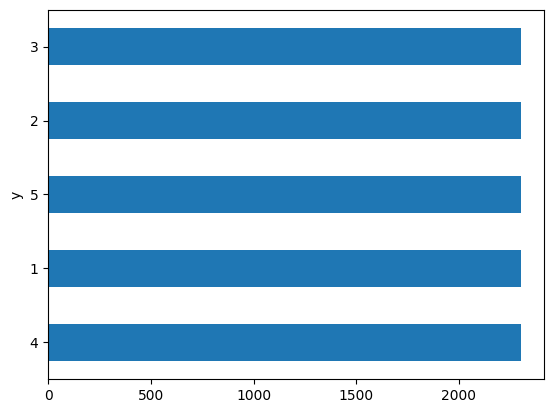

In [12]:
df['y'].value_counts().plot(kind='barh')

About Dataset
Context
This dataset is a pre-processed and re-structured/reshaped version of a very commonly used dataset featuring epileptic seizure detection.

Content
Attribute Information:
The original dataset from the reference consists of 5 different folders, each with 100 files, with each file representing a single subject/person. Each file is a recording of brain activity for 23.6 seconds. The corresponding time-series is sampled into 4097 data points. Each data point is the value of the EEG recording at a different point in time. So we have total 500 individuals with each has 4097 data points for 23.5 seconds.

We divided and shuffled every 4097 data points into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time. So now we have 23 x 500 = 11500 pieces of information(row), each information contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}.

<b>
The response variable is y in column 179, the Explanatory variables X1, X2, …, X178

y contains the category of the 178-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}:

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

2 - They recorder the EEG from the area where the tumor was located

1 - Recording of seizure activity
</b>

<b>All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure.</b> Only subjects in class 1 have epileptic seizure. Our motivation for creating this version of the data was to simplify access to the data via the creation of a .csv version of it. Although there are 5 classes most authors have done binary classification, namely class 1 (Epileptic seizure) against the rest.

This Dataset collect from UCI Machine Learning Repository

Acknowledgements
Andrzejak RG, Lehnertz K, Rieke C, Mormann F, David P, Elger CE (2001) Indications of nonlinear deterministic and finite dimensional structures in time series of brain electrical activity: Dependence on recording region and brain state, Phys. Rev. E, 64, 061907

lets map whole data and convert it to binary classification

In [13]:
df['y'] = df['y'].replace({2: 0, 3: 0, 4: 0, 5: 0})

In [14]:
df

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,0
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,0
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,0


<Axes: ylabel='y'>

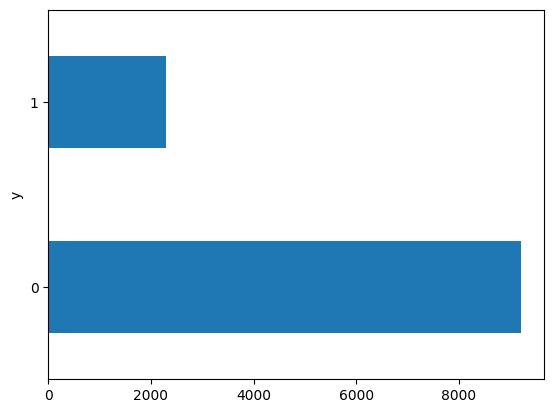

In [15]:
df['y'].value_counts().plot(kind='barh')

In [16]:
df=df.drop('Unnamed',axis=1)

In [17]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,0
11496,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,0
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,121,135,148,143,116,86,68,59,55,0


In [18]:
X=df.drop('y',axis=1)

In [19]:
Y=df['y']

In [20]:
Y

0        0
1        1
2        0
3        0
4        0
        ..
11495    0
11496    1
11497    0
11498    0
11499    0
Name: y, Length: 11500, dtype: int64

There is imbalancing. so lets do under sampling to maintain integrity of data

In [21]:
ros = RandomUnderSampler(random_state=0)

In [22]:
X_resampled,Y_resampled=ros.fit_resample(X,Y)

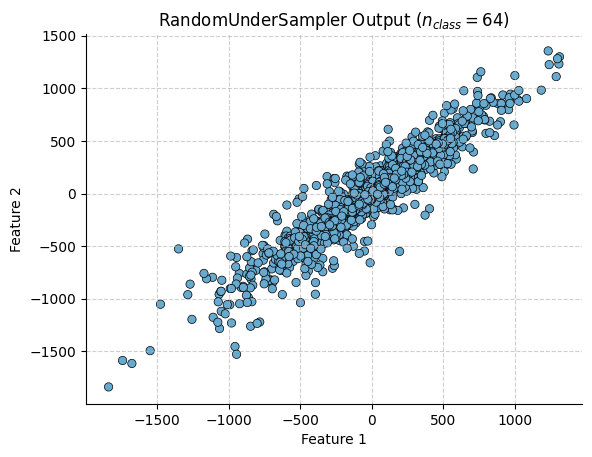

In [23]:
colors = ['#ef8a62' if v == 0 else '#67a9cf' for v in Y_resampled]  # Two distinct colors
plt.scatter(X_resampled.iloc[:, 0], X_resampled.iloc[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomUnderSampler Output ($n_{class}=64)$")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


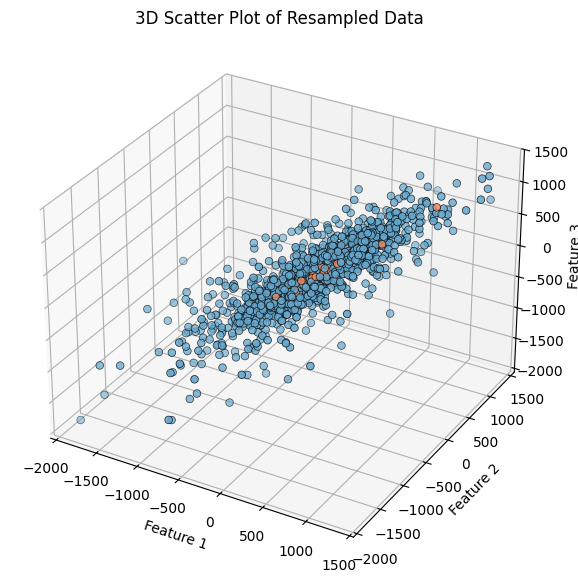

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Assign colors based on class labels
colors = ['#ef8a62' if v == 0 else '#67a9cf' for v in Y_resampled]

# Plot the points
scatter = ax.scatter(
    X_resampled.iloc[:, 0], 
    X_resampled.iloc[:, 1], 
    X_resampled.iloc[:, 2],  # Assuming you have at least 3 features
    c=colors, 
    edgecolor='black', 
    linewidth=0.5, 
    s=30  # Size of points
)

# Add labels and title
ax.set_title("3D Scatter Plot of Resampled Data")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")

# Add grid and show plot
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()


Using standardization

In [25]:
X_resampled

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
4537,-90,-96,-72,-54,-11,27,64,97,132,160,...,-10,-14,-18,-22,-19,-13,-8,-7,-13,-26
5467,57,82,93,68,23,-26,-40,-27,-3,5,...,-21,1,17,22,-5,-22,-45,-35,-37,-42
9837,-94,-116,-91,-94,-68,-50,-7,43,53,34,...,-63,-73,-78,-61,-49,-24,14,44,86,105
11193,184,198,187,147,102,53,8,-40,-117,-185,...,-43,-71,-86,-85,-79,-36,5,53,83,86
8330,-10,-22,-35,-43,-45,-50,-38,-35,-28,-21,...,-129,-119,-115,-116,-113,-119,-123,-114,-107,-95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11487,98,107,121,143,166,184,185,174,153,132,...,-74,-31,11,48,77,95,107,111,110,119
11488,267,409,450,416,334,248,173,113,67,30,...,510,413,288,173,76,7,-27,-46,-58,-67
11490,-22,-64,-121,-201,-292,-336,-398,-527,-773,-1069,...,354,183,-152,-499,-577,-415,-223,-88,-18,-61
11492,-27,-53,-84,-104,-131,-171,-199,-203,-177,-142,...,-136,-127,-114,-99,-79,-56,-28,-14,-8,-12


In [26]:
Y_resampled

4537     0
5467     0
9837     0
11193    0
8330     0
        ..
11487    1
11488    1
11490    1
11492    1
11496    1
Name: y, Length: 4600, dtype: int64

In [27]:
sc=StandardScaler()

In [28]:
X_resampled=sc.fit_transform(X_resampled)

In [29]:
X_resampled

array([[-0.29962628, -0.32883867, -0.2435296 , ...,  0.04242802,
         0.01570338, -0.03877725],
       [ 0.29622495,  0.39076425,  0.4347885 , ..., -0.07305408,
        -0.08338518, -0.10396696],
       [-0.31583992, -0.40969293, -0.32163896, ...,  0.25277041,
         0.42444368,  0.4949635 ],
       ...,
       [-0.02399442, -0.19947186, -0.44496953, ..., -0.2916452 ,
        -0.00494007, -0.18137974],
       [-0.04426147, -0.15500201, -0.29286183, ...,  0.01355749,
         0.03634683,  0.01826375],
       [-0.12532967,  0.01479194,  0.16757228, ...,  0.38887431,
         0.55243307,  0.7597967 ]])

Implementing PCA

In [30]:
pca = PCA(n_components=0.95)  # Retain enough components to explain 95% of variance
X_pca = pca.fit_transform(X_resampled)
print("Number of components selected:", X_pca.shape[1])  # Number of components is reduced dynamically


Number of components selected: 39


In [31]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Variance Explained:", np.cumsum(pca.explained_variance_ratio_))


Explained Variance Ratio: [0.06064938 0.05639208 0.05367578 0.05186023 0.04659719 0.04256599
 0.0394609  0.03717709 0.03469602 0.03237953 0.03073898 0.02929613
 0.02570832 0.02341703 0.02271218 0.02183223 0.02136152 0.02044299
 0.01954726 0.01906107 0.018848   0.01825045 0.01783207 0.01711868
 0.01684196 0.01662323 0.0157323  0.01514067 0.01478026 0.01442909
 0.01401717 0.01326244 0.01278125 0.01207824 0.01146433 0.01019893
 0.00849192 0.0072153  0.00677969]
Cumulative Variance Explained: [0.06064938 0.11704146 0.17071724 0.22257747 0.26917466 0.31174065
 0.35120156 0.38837865 0.42307467 0.4554542  0.48619318 0.51548931
 0.54119763 0.56461466 0.58732684 0.60915908 0.6305206  0.65096359
 0.67051084 0.68957191 0.70841991 0.72667037 0.74450243 0.76162111
 0.77846307 0.7950863  0.8108186  0.82595927 0.84073953 0.85516862
 0.86918579 0.88244823 0.89522947 0.90730771 0.91877204 0.92897097
 0.93746289 0.94467819 0.95145787]


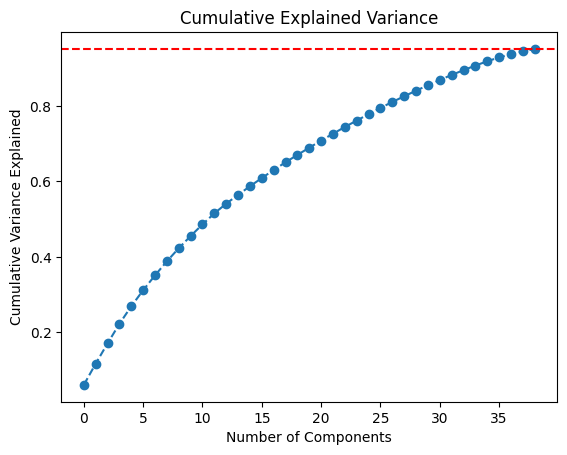

In [32]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.axhline(0.95, color='r', linestyle='--')  # Add a horizontal line at 95%
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.show()


In [33]:
X_pca.shape

(4600, 39)

In [34]:
Y_resampled.shape

(4600,)

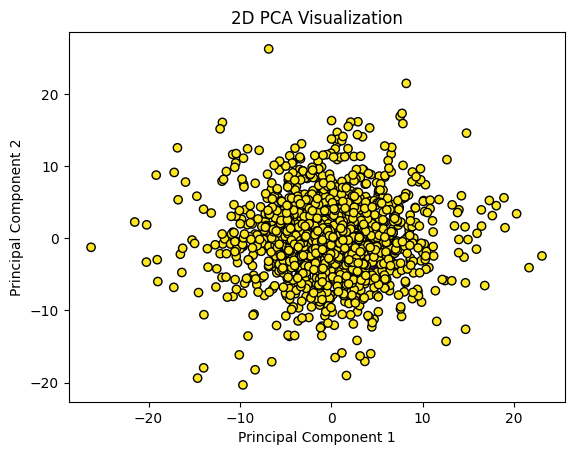

In [35]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y_resampled, cmap='viridis', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization")
plt.show()


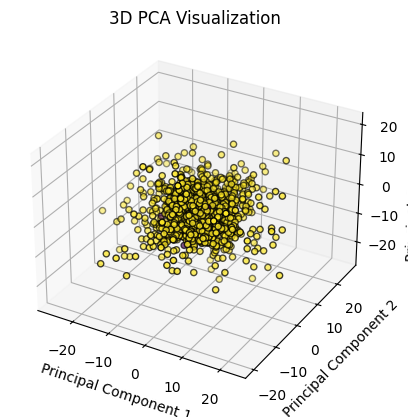

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming X_pca has at least 3 components for the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=Y_resampled, cmap='viridis', edgecolor='k')

# Labels and title
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Visualization")

plt.show()


Now Modelling

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X_pca,Y_resampled,train_size=0.75,random_state=1)

In [38]:
print("training ")
print()
print(f'X Training shape is {X_train.shape}')
print(f'Y Training shape is {Y_train.shape}')

training 

X Training shape is (3450, 39)
Y Training shape is (3450,)


In [39]:
print("testing ")
print()
print(f'X Testing shape is {X_test.shape}')
print(f'Y Testing shape is {Y_test.shape}')

testing 

X Testing shape is (1150, 39)
Y Testing shape is (1150,)


Using classification algorithms first

In [40]:
rfc=RandomForestClassifier()

In [41]:
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [42]:
Y_rfc_predict=rfc.predict(X_test)

In [43]:
rfc_accuracy=accuracy_score(Y_test,Y_rfc_predict)

In [44]:
rfc_accuracy

0.971304347826087

In [46]:
# Assuming Y_test and Y_rfc_predict are already defined
report = classification_report(Y_test, Y_rfc_predict, output_dict=True)
df_report = pd.DataFrame(report).T
print(df_report)

              precision    recall  f1-score      support
0              0.985765  0.956822  0.971078   579.000000
1              0.957483  0.985989  0.971527   571.000000
accuracy       0.971304  0.971304  0.971304     0.971304
macro avg      0.971624  0.971406  0.971303  1150.000000
weighted avg   0.971722  0.971304  0.971301  1150.000000


ML Algorihtms will perform good on this dataset. But i want to make a DL Model(ANN)

In [51]:
X_train.shape

(3450, 39)

In [52]:
ann=keras.Sequential([
    keras.layers.Dense(39,input_shape=(39,),activation='relu'),
    keras.layers.Dense(39,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    
])

c:\Users\Dell\anaconda3\envs\streamlitenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
ann.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [55]:
ann.fit(X_train,Y_train,epochs=50)

Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9735 - loss: 0.0845
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9769 - loss: 0.0650
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9752 - loss: 0.0646
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9786 - loss: 0.0615
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9841 - loss: 0.0517
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9902 - loss: 0.0409
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9890 - loss: 0.0417
Epoch 8/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9918 - loss: 0.0396
Epoch 9/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9931 - loss: 0.0305
Epoch 10/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9928 - loss: 0.0294
Epoch 11/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9923 - loss: 0.0268
Epoch 12/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/ste

In [56]:
ann.evaluate(X_test,Y_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9454 - loss: 0.2661


[0.2941194474697113, 0.9504348039627075]

In [57]:
predictions=ann.predict(X_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [58]:
predictions

array([[2.1322511e-07],
       [7.3369265e-06],
       [2.4311078e-06],
       ...,
       [1.0000000e+00],
       [1.5150080e-06],
       [1.0000000e+00]], dtype=float32)

In [59]:
Y_pred=[]
for element in predictions:
    if element>0.5:
        Y_pred.append(1)
    else:
        Y_pred.append(0)

In [60]:
Y_pred

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,


In [62]:
ann_report=classification_report(Y_test,Y_pred, output_dict=True)

In [63]:
ann_report = pd.DataFrame(ann_report).T
print(ann_report)

              precision    recall  f1-score      support
0              0.942373  0.960276  0.951240   579.000000
1              0.958929  0.940455  0.949602   571.000000
accuracy       0.950435  0.950435  0.950435     0.950435
macro avg      0.950651  0.950366  0.950421  1150.000000
weighted avg   0.950593  0.950435  0.950427  1150.000000


In this project we implemented PCA+ANN and achieved->
1. Accuracy-> 95.04 percent
2. Precision->95.89 percent
3. Recall-> 94.04 percent